# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

Load image files, convert to HSV, save as HSV

---
## Step 0: Load The Data

In [3]:
# Load pickled data
import pickle
import numpy as np

# TODO: Fill this in based on where you saved the training and testing data

training_file = "traffic-signs-data/train.p"
validation_file= "traffic-signs-data/valid.p"
testing_file = "traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Convert to HSV

In [4]:
import cv2

X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

X_train_hsv = np.zeros_like(X_train)
X_valid_hsv = np.zeros_like(X_valid)
X_test_hsv = np.zeros_like(X_test)

for i in range(n_train):
    X_train_hsv[i,:,:,:] = cv2.cvtColor(X_train[i,:,:,:], cv2.COLOR_RGB2HSV)

for i in range(n_validation):
    X_valid_hsv[i,:,:,:] = cv2.cvtColor(X_valid[i,:,:,:], cv2.COLOR_RGB2HSV)

for i in range(n_test):
    X_test_hsv[i,:,:,:] = cv2.cvtColor(X_test[i,:,:,:], cv2.COLOR_RGB2HSV)

train['features'] = X_train_hsv
valid['features'] = X_valid_hsv
test['features'] = X_test_hsv


X_train shape: (34799, 32, 32, 3)
X_test shape: (12630, 32, 32, 3)


In [5]:
WRITE = False
if WRITE:
    hsv_training_file = "traffic-signs-data/train_hsv.p"
    hsv_validation_file= "traffic-signs-data/valid_hsv.p"
    hsv_testing_file = "traffic-signs-data/test_hsv.p"

    with open(hsv_training_file, mode='wb') as f:
        pickle.dump(train, f)
    with open(hsv_validation_file, mode='wb') as f:
        pickle.dump(valid, f)
    with open(hsv_testing_file, mode='wb') as f:
        pickle.dump(test, f)


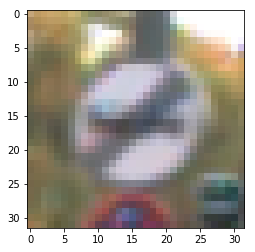

[[ 17  18  18 ...,   0   0   0]
 [ 17  19  18 ...,   0   0   0]
 [ 17  18  19 ...,   0   0   0]
 ..., 
 [ 26  25  23 ..., 101  99 120]
 [ 20  22  23 ...,  99  97 108]
 [ 15  18  22 ...,  60  78  73]]
[[ 96 121 124 ...,   0   0   0]
 [110 128 125 ...,   0   0   0]
 [107 122 122 ...,   0   0   0]
 ..., 
 [ 86  94  88 ...,  51  48   7]
 [110 113 101 ...,  63  77  16]
 [123 111  98 ...,  50  64  21]]
[[197 189 198 ..., 255 255 255]
 [170 177 185 ..., 255 255 255]
 [165 163 169 ..., 255 255 255]
 ..., 
 [119 122 131 ..., 105  90  73]
 [135 131 129 ...,  57  56  80]
 [154 149 136 ...,  51  68  86]]


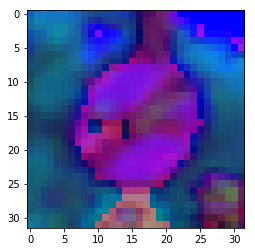

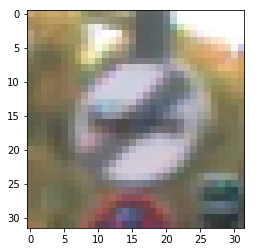

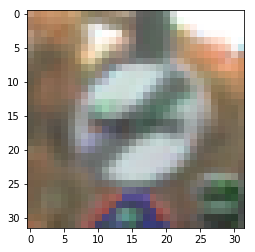

255


In [12]:
import matplotlib.pyplot as plt
from matplotlib.colors import hsv_to_rgb
ind = 100

img = X_train[ind,:,:,:]

plt.imshow(img)
plt.show()

imghsv = X_train_hsv[ind,:,:,:]

print(imghsv[:,:,0])
print(imghsv[:,:,1])
print(imghsv[:,:,2])

plt.imshow(imghsv)
plt.show()

imgrgb = cv2.cvtColor(imghsv, cv2.COLOR_HSV2RGB)

plt.imshow(imgrgb)
plt.show()

plt.imshow(hsv_to_rgb(imghsv/255.))
plt.show()

print(np.max(X_train_hsv))